In [144]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [145]:
df= pd.read_csv('preprocessed_data.csv')
#df=df_1[:10000]
df = df.astype(float)
df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)
label = 'price'
y = df[label]
X = df.drop(columns=[label])

In [146]:
def ML_pipeline_kfold_random_forest(X, y, random_state, n_folds): 
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state) 
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 
    
    CV_scores = []
    r2score=[]
    best_parameters = [] 

    for train_index, CV_index in kf.split(X_other, y_other): 
        
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()] 
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()] 

        parameters = np.logspace(-4,4,num=4) 
        
        regs = []
        CV_score = []
        train_score = []

        for i in parameters: 
            reg = Ridge(alpha = i)
            reg.fit(X_train, y_train) 
        
            train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
            CV_score.append(mean_squared_error(y_CV,reg.predict(X_CV)))
            regs.append(reg)
        
        best_i = parameters[np.argmin(CV_score)] 
        best_parameters.append(best_i) 
        
        reg = regs[np.argmin(CV_score)]
        CV_scores.append(np.min(CV_score))
        
        r2score.append(reg.score(X_test,y_test))
        
        best_para = best_parameters[np.argmax(r2score)] 
        
    return best_para, min(CV_score), max(r2score)

In [147]:
test_scores_list = [] 
for i in range(10): 
    random_state = 23*(i+1)
    best_para, CV_score, r2_score = ML_pipeline_kfold_random_forest(X, y, random_state, 5) 
    test_scores_list.append(r2_score) 
    print('random state = {}. Best alpha is {}. CV_score is {}. r2_score is {}'.format(random_state, best_para, CV_score, test_scores_list[-1])) 
average_list = np.mean(test_scores_list) 
std_list = np.std(test_scores_list)
print('average:', np.around(average_list,3))
print('std:', np.around(std_list,3))
print('test accuracy score:', np.around(average_list,3), '+/-', np.around(std_list,3))

random state = 23. Best alpha is 21.54434690031882. CV_score is 29480.291586234045. r2_score is 0.1218432266702949
random state = 46. Best alpha is 21.54434690031882. CV_score is 23896.923451619543. r2_score is 0.11430643159324472
random state = 69. Best alpha is 21.54434690031882. CV_score is 62978.762770658774. r2_score is 0.10288424948535468
random state = 92. Best alpha is 21.54434690031882. CV_score is 51305.91842767803. r2_score is 0.12761810936616835
random state = 115. Best alpha is 21.54434690031882. CV_score is 48970.75468742916. r2_score is 0.07932474452693572
random state = 138. Best alpha is 21.54434690031882. CV_score is 51206.728069530924. r2_score is 0.12360084323947584
random state = 161. Best alpha is 21.54434690031882. CV_score is 52477.5137317859. r2_score is 0.09224901344768299
random state = 184. Best alpha is 21.54434690031882. CV_score is 41498.55881727585. r2_score is 0.18064400465763242
random state = 207. Best alpha is 21.54434690031882. CV_score is 42623.004

In [56]:
best_reg

Ridge(alpha=51.79474679231202, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
best_X_test.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,race_hispanic,race_white,availability_365,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,time
548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.455707,0.555257,-0.147729,1.093724,-0.207173,-0.125757,1.826093
314,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.693151,0.748010,0.573114,0.339830,0.061179,-0.513947,-0.125757,2.855555
811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.444600,0.476112,-0.245240,-0.230627,-0.570293,-0.186451,2.116521
104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.416438,0.516684,0.569501,-0.196484,6.997186,1.207745,-0.186451,-0.466210
32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.778082,0.538147,0.577310,-0.147729,3.899552,0.350029,-0.125757,-0.510293


In [58]:
best_y_test.head()

548     67.0
314    113.0
811    189.0
104    101.0
32      55.0
Name: price, dtype: float64

In [61]:
nr_runs = 10
ftr_names = X.columns
scores = np.zeros([len(ftr_names),nr_runs])

test_score = best_reg.score(best_X_test, best_y_test)
#print('test score = ',test_score)
#print('test baseline = ',np.sum(test_y == 0)/len(test_y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = best_X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(best_X_test[ftr_names[i]].values)
        acc_scores.append(reg.score(X_test_shuffled,best_y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling neighbourhood_group_Bronx
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_group_Brooklyn
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_group_Manhattan
   shuffled test score: 0.022 +/- 0.007
shuffling neighbourhood_group_Queens
   shuffled test score: 0.036 +/- 0.0
shuffling neighbourhood_group_Staten Island
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Allerton
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Arden Heights
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Arrochar
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Arverne
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Astoria
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Bath Beach
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Battery Park City
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Bay Ridge
   shuffled test score: 0.037 +/- 0.0
shuffling neighbourhood_Bay T

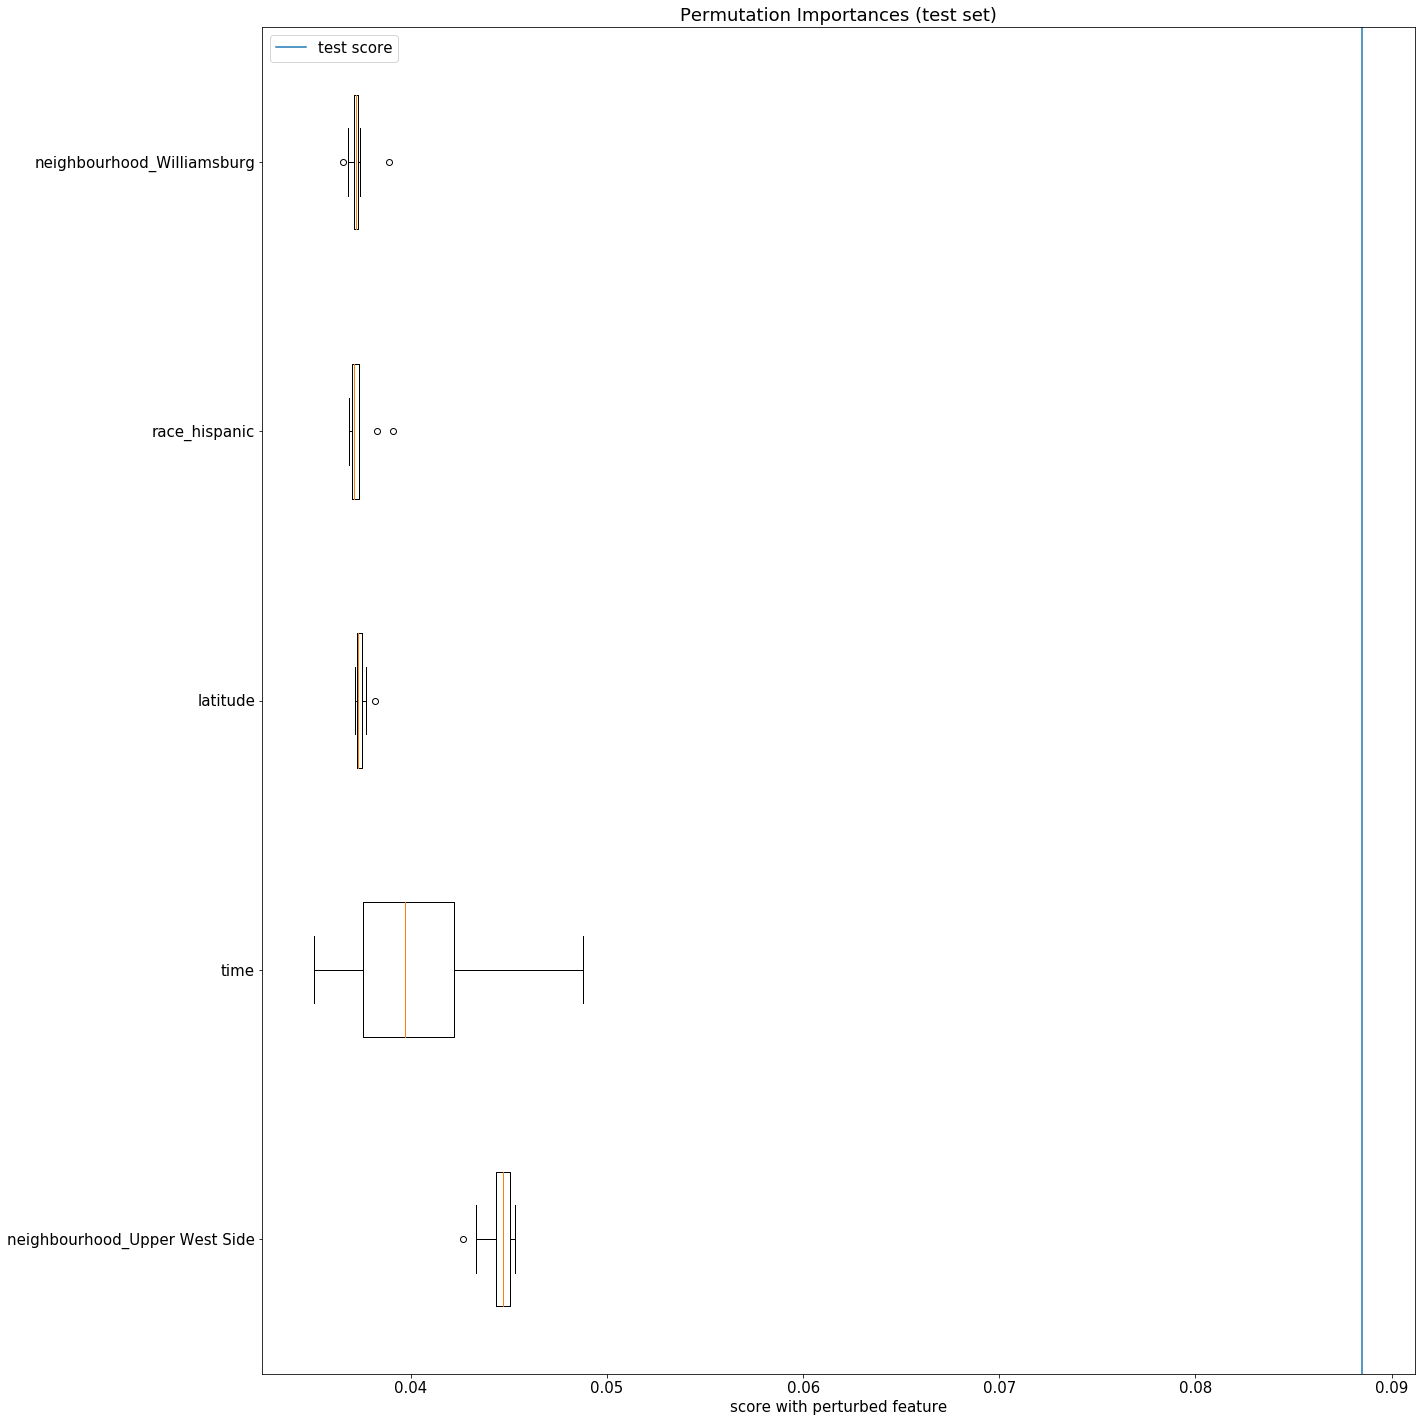

<Figure size 432x288 with 0 Axes>

In [110]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1][:5]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,20))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('permutation_importance.png',dpi=100)